In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

print("✅ Environment Loaded")
print("OpenAI Key:", bool(os.getenv("OPENAI_API_KEY")))


✅ Environment Loaded
OpenAI Key: True


Matplotlib is building the font cache; this may take a moment.


✅ OpenAI Key Loaded: True


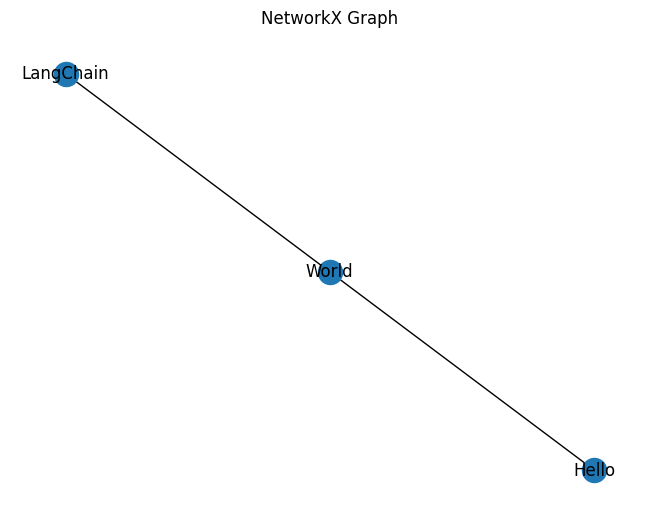

OpenAI embedding ready Generated Embedding Vector Length: 1536
🔗 AstraDB VectorStore Ready


In [2]:
import os
from dotenv import load_dotenv
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt

# LangChain imports
from langchain_openai import OpenAIEmbeddings
from langchain_astradb.graph_vectorstores import AstraDBVectorStore
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

# Load environment variables
load_dotenv()
# Check OpenAI key exists
openai_key = os.getenv("OPENAI_API_KEY")

print(f"✅ OpenAI Key Loaded: {bool(openai_key)}")
# Create a simple graph
G = nx.Graph()
G.add_edge("Hello", "World")
G.add_edge("World", "LangChain")
# Visualize with matplotlib
nx.draw(G, with_labels=True)
plt.title("NetworkX Graph")
plt.show()
# Visualize with pyvis
net = Network(notebook=False)
net.from_nx(G)


# Create dummy embedding (OpenAI will fail if no key is set, but we test it)
embedding_model = OpenAIEmbeddings(model="text-embedding-3-small")
# Test text for embedding
test_text = "This is a test sentence."

# Generate the embedding
embedding_vector = embedding_model.embed_query(test_text)

# Measure the length of the vector
vector_length = len(embedding_vector)

# Output results
print(f"OpenAI embedding ready Generated Embedding Vector Length: {vector_length}")


vectorstore = AstraDBVectorStore(
    collection_name="testgraphrag",
    namespace=os.getenv("ASTRA_DB_KEYSPACE"),
    embedding=embedding_model,
)
vectorstore.astra_env.collection
print("🔗 AstraDB VectorStore Ready")